## Bir Graph olusturdum onu görselleştirdim

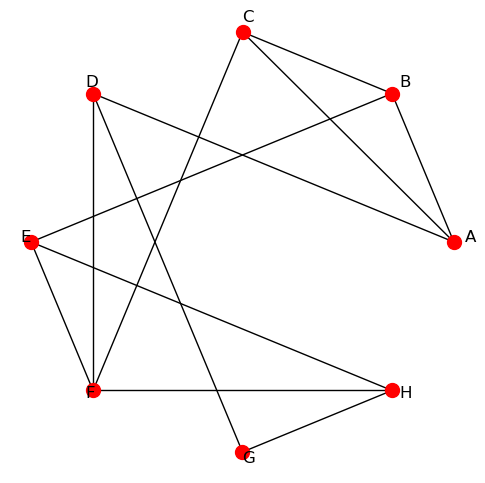

In [21]:
import matplotlib.pyplot as plt

# Ağımız
graph = {
    "A": ["B", "C", "D"],
    "B": ["A", "C", "E"],
    "C": ["A", "B", "F"],
    "D": ["A", "F", "G"],
    "E": ["B", "F", "H"],
    "F": ["C", "D", "E", "H"],
    "G": ["D", "H"],
    "H": ["E", "F", "G"]
}

#graph olustururken dictionary yapısı tercih ettim daha kolay liste seklınde 
#yaparsam kenarları tutardım onların dugumlerını bulmak ıcın tek tek gezmem gerekırdı daha uzun oluyor. 

# Görselleştirme için edge list oluştur
edges = []
for node, neighbors in graph.items():
    for neighbor in neighbors:
        if [neighbor, node] not in edges:  # tekrarları önle
            edges.append([node, neighbor])

# Düğümleri ve konumlarını belirle
nodes = list(graph.keys())
pos = {}
angle = 0
import math
for i, node in enumerate(nodes):
    angle = i * (2*math.pi / len(nodes))
    pos[node] = (math.cos(angle), math.sin(angle))  # dairesel yerleşim

# Ağ çizimi
plt.figure(figsize=(6,6))
for edge in edges:
    x = [pos[edge[0]][0], pos[edge[1]][0]]
    y = [pos[edge[0]][1], pos[edge[1]][1]]
    plt.plot(x, y, 'k-', lw=1)

# Düğümleri çiz
for node, (x, y) in pos.items():
    plt.plot(x, y, 'ro', markersize=10)
    plt.text(x*1.05, y*1.05, node, fontsize=12)

plt.axis('off')
plt.show()


## Degree Centrality (Derece Merkezliği)

In [24]:
#Derece merkeziliği, bir düğümün ağa olan doğrudan bağlantı sayısını, ağdaki diğer tüm düğümlerin sayısına bölerek hesaplıyoruz.
#dugumun toplam baglantı sayısı(dugumun derecesi) / graphtakı toplam düğümler  "dugumun agdakı toplam kac tane dugume baglı oldugunu buluyoruz "

#graphı olustururken dıctıonary yapısında yanı kenarların sayısına ve ne olduguna graph["A"] gibi erişebilirim
def degree_centrality(graph):
    toplam_dugum_sayisi=len(graph)
    merkez={}
    for node in graph:
        derece=len(graph[node])
        merkez[node]=derece/(toplam_dugum_sayisi-1)
    return merkez

degree_centrality(graph)

{'A': 0.42857142857142855,
 'B': 0.42857142857142855,
 'C': 0.42857142857142855,
 'D': 0.42857142857142855,
 'E': 0.42857142857142855,
 'F': 0.5714285714285714,
 'G': 0.2857142857142857,
 'H': 0.42857142857142855}

## Closeness Centrality 

In [31]:
# tum dugumler / tum dugumlere gıdıs uzunluklarının toplamı  

#ilk basta bır tane dugum sececegım A olsun bu sonrasında bu dugumun kenarlarını 
#alacagım A-B  A-D  seklınde A nın kenarları bıttıkten sonra B den devam edecegım
#O da soyle olacak A-B-C  A-B-E  dıye devam edecek anın komsuları B ve D bıttıkten sorna 
#C ile E ye bakacagım sırasıyla gıdecek o zaman tekrara dusmememesı ıcın dugumlerı tutan bır lısteye ve bır kuyruk yapısı yaparsam kuyruga eklerım 
#ve kuyruktakı ıle lısteyı karsılastırırım.
#A dan B ye 1 A'dan E'ye 2 seklınde 

def en_kisa_yol(graph, baslangic_node):
    visited = {baslangic_node: 0}   # 1️⃣ başlangıç düğümüne mesafe 0
    queue = [baslangic_node]        # 2️⃣ kuyruk: hangi düğümleri sırayla işleyeceğimizi tut

    while queue:
        node = queue.pop(0)          # 3️⃣ FIFO: sıradaki düğümü al
        for neighbor in graph[node]: # 4️⃣ node'un komşularını kontrol et
            if neighbor not in visited:         # 5️⃣ henüz ziyaret edilmemişse
                visited[neighbor] = visited[node] + 1  # 6️⃣ mesafeyi ata
                queue.append(neighbor)                   # 7️⃣ kuyrukta sıraya ekle
    return visited


def closeness_centrality(graph):
    n = len(graph)  # toplam düğüm sayısı
    centrality = {}
    for node in graph:
        sp_lengths = en_kisa_yol(graph, node)  # o düğümden diğer düğümlere mesafe
        total_dist = sum(sp_lengths.values())            # mesafeleri topla
        if total_dist > 0:
            centrality[node] = (n-1) / total_dist       # formül
        else:
            centrality[node] = 0
    return centrality


yol=en_kisa_yol(graph,"A")
print(yol)
cc = closeness_centrality(graph)
print(cc)
                
        


{'A': 0, 'B': 1, 'C': 1, 'D': 1, 'E': 2, 'F': 2, 'G': 2, 'H': 3}
{'A': 0.5833333333333334, 'B': 0.5833333333333334, 'C': 0.5833333333333334, 'D': 0.6363636363636364, 'E': 0.6363636363636364, 'F': 0.7, 'G': 0.5, 'H': 0.5833333333333334}


In [58]:
def en_kisa_yol_paths(graph, baslangic_node):
    visited = {baslangic_node: 0}
    paths = {baslangic_node: 1}  # başlamak için 1 yol
    predecessors = {node: [] for node in graph}
    queue = [baslangic_node]

    while queue:
        node = queue.pop(0)
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited[neighbor] = visited[node] + 1
                paths[neighbor] = paths[node]  # parent paths
                predecessors[neighbor].append(node)
                queue.append(neighbor)
            elif visited[neighbor] == visited[node] + 1:
                paths[neighbor] += paths[node]
                predecessors[neighbor].append(node)
    return visited, paths, predecessors

def betweenness_centrality(graph):
    # Başlangıçta tüm düğümlerin betweenness değeri 0
    centrality = {node: 0 for node in graph}

    for s in graph:
        # BFS ile en kısa yollar ve predecessors
        visited, paths, predecessors = en_kisa_yol_paths(graph, s)

        # dependency (düğümlerin üzerlerinden geçen yolların katkısı)
        dependency = {node: 0 for node in graph}

        # düğümleri mesafeye göre sondan başa sırala (BFS reverse)
        nodes_by_distance = sorted(visited, key=lambda x: visited[x], reverse=True)

        for node in nodes_by_distance:
            for pred in predecessors[node]:
                # node üzerindeki katkıyı pred'e dağıt
                coef = paths[pred] / paths[node] * (1 + dependency[node])
                dependency[pred] += coef
            if node != s:
                centrality[node] += dependency[node]

    # Eğer graph çift yönlü ise normalize etmek için 2'ye böl
    for node in centrality:
        centrality[node] /= 2

    return centrality
bc = betweenness_centrality(graph)
print(bc)


{'A': 2.333333333333333, 'B': 1.75, 'C': 1.25, 'D': 3.666666666666666, 'E': 2.25, 'F': 4.666666666666666, 'G': 0.75, 'H': 2.333333333333333}


In [60]:
def eigenvector_centrality(graph, max_iter=100, tol=1e-6):
    # Başlangıçta tüm düğümlere 1 ata
    centrality = {node: 1.0 for node in graph}

    for _ in range(max_iter):
        new_centrality = {}
        # Her düğüm için: komşuların değerlerini topla
        for node in graph:
            new_centrality[node] = sum(centrality[neighbor] for neighbor in graph[node])
        
        # Normalize et
        norm = sum(value**2 for value in new_centrality.values()) ** 0.5
        for node in new_centrality:
            new_centrality[node] /= norm
        
        # Konverjans kontrolü
        diff = max(abs(new_centrality[node] - centrality[node]) for node in graph)
        centrality = new_centrality
        if diff < tol:
            break

    return centrality

ec = eigenvector_centrality(graph)
print(ec)

{'A': 0.34184957744564565, 'B': 0.3524143021724269, 'C': 0.3733931082866801, 'D': 0.32941428522911187, 'E': 0.372591385485774, 'F': 0.4583297603018404, 'G': 0.21666068366983002, 'H': 0.3393736581273369}


In [64]:
def pagerank(graph, alpha=0.85, max_iter=100, tol=1e-6):
    N = len(graph)
    # Başlangıç: tüm düğümlere eşit değer
    PR = {node: 1/N for node in graph}

    for _ in range(max_iter):
        new_PR = {}
        for node in graph:
            rank_sum = 0
            # Komşuların katkısı
            for neighbor in graph:
                if node in graph[neighbor]:
                    rank_sum += PR[neighbor] / len(graph[neighbor])
            new_PR[node] = (1 - alpha)/N + alpha * rank_sum

        # Konverjans kontrolü
        diff = max(abs(new_PR[node] - PR[node]) for node in graph)
        PR = new_PR
        if diff < tol:
            break

    return PR
    
pr = pagerank(graph, alpha=0.85)
print(pr)

{'A': 0.12475605534932832, 'B': 0.12413698858869525, 'C': 0.12337049772137047, 'D': 0.12663293632107409, 'E': 0.1238273318543878, 'F': 0.1604729069631442, 'G': 0.09043363127686514, 'H': 0.12636965192513483}


In [17]:
import networkx as nx

G=nx.karate_club_graph()
